#### BFS and DFS

BFS Traversal Order from node 0: [0, 1, 2, 3, 4, 5]
DFS Traversal Order from node 0: [0, 1, 3, 5, 4, 2]


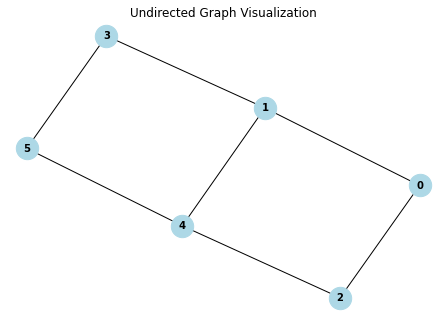

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Step 1: Create an empty graph
def create_graph(vertices):
    return {
        "V": vertices,
        "edges": [],
        "adj_list": {i: [] for i in range(vertices)}
    }

# Step 2: Add an undirected edge
def add_edge(graph, u, v):
    graph["edges"].append((u, v))
    graph["adj_list"][u].append(v)
    graph["adj_list"][v].append(u)

# Step 3: Breadth-First Search (BFS)
def bfs(graph, start):
    visited = [False] * graph["V"]
    queue = deque([start])
    traversal_order = []

    visited[start] = True

    while queue:
        u = queue.popleft()
        traversal_order.append(u)

        for v in graph["adj_list"][u]:
            if not visited[v]:
                visited[v] = True
                queue.append(v)

    return traversal_order

# Step 4: Depth-First Search (DFS) using a stack
def dfs(graph, start):
    visited = [False] * graph["V"]
    stack = [start]
    traversal_order = []

    while stack:
        v = stack.pop()
        if not visited[v]:
            visited[v] = True
            traversal_order.append(v)

            for neighbor in reversed(graph["adj_list"][v]):
                if not visited[neighbor]:
                    stack.append(neighbor)

    return traversal_order

# Step 5: Draw the graph using NetworkX
def draw_graph(graph):
    G = nx.Graph()

    for u, v in graph["edges"]:
        G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    plt.title("Undirected Graph Visualization")
    plt.show()


# --- Example usage ---
g = create_graph(6)

add_edge(g, 0, 1)
add_edge(g, 0, 2)
add_edge(g, 1, 3)
add_edge(g, 1, 4)
add_edge(g, 2, 4)
add_edge(g, 3, 5)
add_edge(g, 4, 5)

source = 0

print(f"BFS Traversal Order from node {source}: {bfs(g, source)}")
print(f"DFS Traversal Order from node {source}: {dfs(g, source)}")

draw_graph(g)
